Exploratory DATA Analysis



In [156]:
##Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
## Read csv file into a pandas dataframe
data=pd.read_csv('Titanic.csv',index_col=0)

In [158]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [160]:
## To show the summary statistics
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
## Check the null values in the column
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [162]:
data.shape


(891, 11)

In [163]:
data.drop_duplicates().shape

(891, 11)

Let's work on Null values of Columns

EMBARKED

In [164]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [165]:
data[data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [166]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [167]:
## Fill the Null values with mode of Column'Embarked'
mode_value=data.Embarked.mode().values[0]
mode_value

'S'

In [168]:
data['Embarked']=data.Embarked.fillna(mode_value)

In [169]:
data[data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [170]:
data.Embarked=data.Embarked.map({'S':0,'C':1,'Q':2})
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


AGE


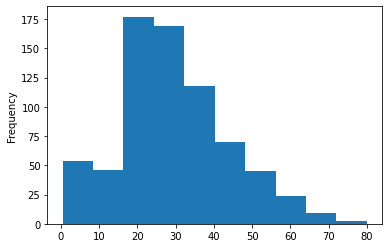

In [172]:

data.Age.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


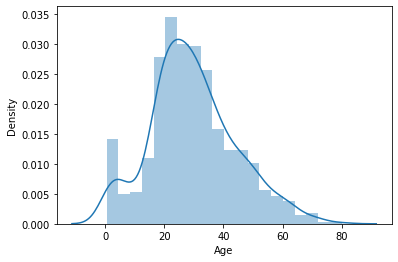

In [173]:
sns.distplot(data['Age'])

In [174]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


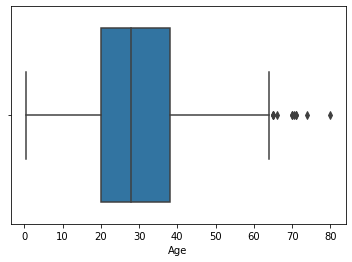

In [175]:
sns.boxplot(data['Age'])

There are outliers present in the Age column .In this case , we can replace the null values with Median instead of Mean value as data is skewed and median is not affected by the outliers.

In [176]:
#fill the nullvalues with Median of column'Age'
median_value=data.Age.median()
median_value

28.0

In [177]:
data['Age']=data['Age'].fillna(median_value)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


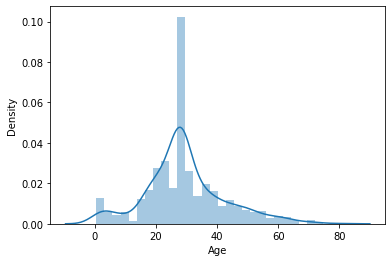

In [178]:
sns.distplot(data['Age'])

CABIN, NAME, TICKET - Unwanted Columns


In [179]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [180]:
data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
              ..
B42            1
A5             1
B82 B84        1
C32            1
B86            1
Name: Cabin, Length: 147, dtype: int64

In [181]:
data.Name.value_counts()

McDermott, Miss. Brigdet Delia                     1
Bryhl, Mr. Kurt Arnold Gottfrid                    1
Ostby, Mr. Engelhart Cornelius                     1
Sage, Miss. Dorothy Edith "Dolly"                  1
Goodwin, Master. Harold Victor                     1
                                                  ..
Braund, Mr. Owen Harris                            1
Mellors, Mr. William John                          1
Backstrom, Mr. Karl Alfred                         1
Dahlberg, Miss. Gerda Ulrika                       1
Andersen-Jensen, Miss. Carla Christine Nielsine    1
Name: Name, Length: 891, dtype: int64

In [182]:
data.drop(['Name','Cabin','Ticket'],axis=1, inplace=True)

In [183]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,0
4,1,1,female,35.0,1,0,53.1000,0
5,0,3,male,35.0,0,0,8.0500,0


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [185]:
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [186]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


Identifying the top features for the dataset showing the importance with the class variable.


In [187]:
##data_target=data.copy()

In [188]:
##output=data_target['Survived']

In [189]:
#data.drop('Survived',axis=1,inplace=True)

In [190]:
"'from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(data,output)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 
bestfeature_columns = featureScores.nlargest(7,'Score')##
#print  best features
print(bestfeature_columns)"'

SyntaxError: ignored

In [191]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


Visualisation on Survived and NOT Survived

In [193]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived/NON Survived')

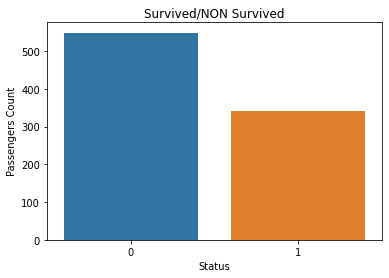

In [198]:
sns.countplot(data['Survived'])
plt.xlabel('Status')
plt.ylabel('Passengers Count')
plt.title('Survived/NON Survived')
